In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import time
rand_seed = int(time.time())
np.random.seed(rand_seed)
tf.set_random_seed(rand_seed)

In [21]:
# Load data from GitHub to this notebook's local drive
REDUCED_DATA_FILE = 'tumors_reduced.csv'
url = "https://raw.githubusercontent.com/madewithml/lessons/master/data/tumors_reduced.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(REDUCED_DATA_FILE, 'wb') as fp:
    fp.write(html)

In [22]:
df = pd.read_csv(REDUCED_DATA_FILE, header=0)
df.head()

,leukocyte_count,blood_pressure,tumor_class
0,13.472969,15.250393,malignant
1,10.805510,14.109676,malignant
2,13.834053,15.793920,malignant
3,9.572811,17.873286,malignant
4,7.633667,16.598559,malignant


In [23]:
X = df[['leukocyte_count', 'blood_pressure']].values
y = df['tumor_class'].values

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [25]:
y_labeller = LabelEncoder()
y_samples = y_labeller.fit_transform(y)

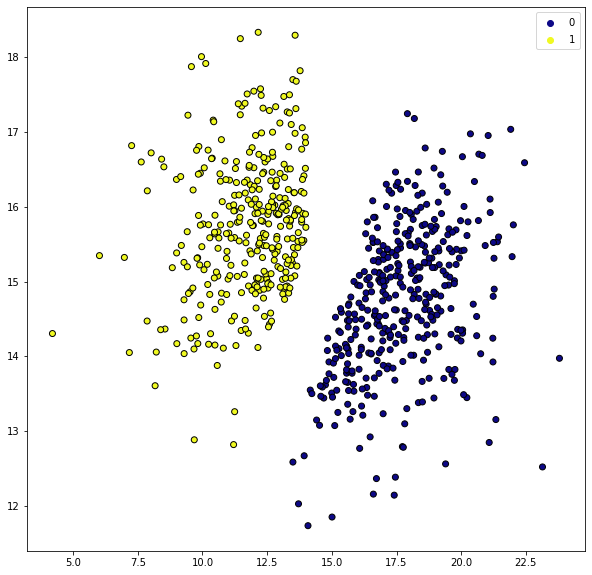

In [26]:
plt.figure(figsize=(10, 10))

hdl = plt.scatter(X[:, 0], X[:, 1], c=y_samples, edgecolors='black', cmap='plasma')

plt.legend(handles=hdl.legend_elements()[0], labels=hdl.legend_elements()[1], scatterpoints=1)

plt.show()

,leukocyte_count,blood_pressure
leukocyte_count,1.00000,-0.25974
blood_pressure,-0.25974,1.00000


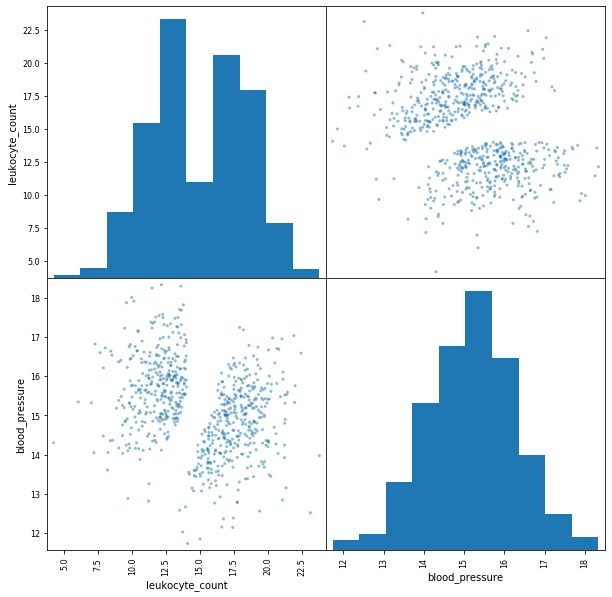

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10))
df.corr()

In [28]:
import ml_utils

In [29]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = ml_utils.train_validate_test_split(X, y_samples, validate_size=0.15, test_size=0.15)

In [30]:
x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_val = x_scaler.transform(x_val)
x_test = x_scaler.transform(x_test)

# Reduced Dataset

In [31]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
INPUT_DIM = 2 # X is 2-dimensional
HIDDEN_DIM = 100
NUM_CLASSES = 2
class MLP(Model):
    def __init__(self, hidden_dim, num_classes):
        super(MLP, self).__init__(name='mlp')
        self.fc1 = Dense(units=hidden_dim, activation='relu', name='W1')
        self.fc2 = Dense(units=num_classes, activation='softmax', name='W2')
        
    def call(self, x_in, training=False):
        z = self.fc1(x_in)
        y_pred = self.fc2(z)
        return y_pred
    
    def summary(self, input_shape):
        x_in = Input(shape=input_shape, name='X')
        summary = Model(inputs=x_in, outputs=self.call(x_in), name=self.name)
        return plot_model(summary, show_shapes=True) # forward pass

In [32]:
model = MLP(hidden_dim=HIDDEN_DIM, num_classes=NUM_CLASSES)

In [33]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [34]:
model.fit(x_train, y_train, validation_data=[x_val, y_val],
          epochs=100, batch_size=50)

Train on 504 samples, validate on 108 samples
Epoch 1/100
504/504 [==============================] - 19s 37ms/step - loss: 0.3612 - sparse_categorical_accuracy: 0.8988 - val_loss: 0.0905 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/100
504/504 [==============================] - 0s 99us/step - loss: 0.0491 - sparse_categorical_accuracy: 0.9980 - val_loss: 0.0134 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/100
504/504 [==============================] - 0s 118us/step - loss: 0.0102 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0043 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/100
504/504 [==============================] - 0s 121us/step - loss: 0.0038 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0028 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/100
504/504 [==============================] - 0s 105us/step - loss: 0.0025 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0020 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/100
504/504 [===================

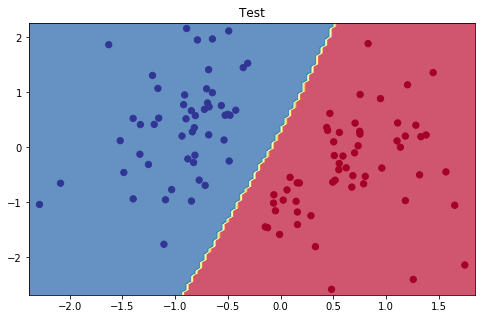

In [38]:
# Visualize the decision boundary
plt.figure(figsize=(8,5))
plt.title("Test")
ml_utils.plot_multiclass_decision_boundary(model=model, X=x_test, y=y_test)

plt.show()